In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

###Basic preprocessing

In [53]:
data= pd.read_csv("/content/StudentPerformanceFactors.csv")

In [54]:
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [55]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [57]:
#Check for null values

data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [58]:
#delete missing value rows
data = data.dropna()

In [59]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [60]:
#finds the unique values in each column

for col in data.columns:
  print(col, data[col].unique())

Hours_Studied [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]
Attendance [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Sleep_Hours [ 7  8  6 10  9  5  4]
Previous_Scores [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Tutoring_Sessions [0 2 1 3 4 5 6 7 8]
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low']
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Physical_Activity [3 4 2 

In [61]:
# Clean categorical columns
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [62]:
# Unique values for each column
for column in categorical_columns:
    print(column, data[column].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low']
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate']
Distance_from_Home ['Near' 'Moderate' 'Far']
Gender ['Male' 'Female']


In [63]:
#replace values of categorical values with numerical with 1, 2, 3

data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})
data = data.replace({'Male': 0, 'Female': 1})
data = data.replace({'No' : 0, 'Yes' : 1})
data = data.replace({'Public' : 0, 'Private' : 1})
data = data.replace({'Positive': 1, 'Neutral': 0, 'Negative' : -1})
data = data.replace({'High School' : 1, 'College' : 2, 'Postgraduate' : 3})
data = data.replace({'Near' : 1, 'Moderate' : 2, 'Far' : 3})

In [64]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,0,1,3,0,1,1,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,0,-1,4,0,2,2,1,61
2,24,98,2,2,1,7,91,2,1,2,2,2,0,0,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,0,-1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,0,0,4,0,2,1,1,70


In [65]:
#add column difference in scores
data['Diff_in_Scores'] = data['Previous_Scores'] - data['Exam_Score']

In [66]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Diff_in_Scores
0,23,84,1,3,0,7,73,1,1,0,...,2,0,1,3,0,1,1,0,67,6
1,19,64,1,2,0,8,59,1,1,2,...,2,0,-1,4,0,2,2,1,61,-2
2,24,98,2,2,1,7,91,2,1,2,...,2,0,0,4,0,3,1,0,74,17
3,29,89,1,2,1,8,98,2,1,1,...,2,0,-1,4,0,1,2,0,71,27
4,19,92,2,2,1,6,65,2,1,3,...,3,0,0,4,0,2,1,1,70,-5


In [67]:
#Scores Categories
data['Exam_Score'] = pd.to_numeric(data['Exam_Score'], errors='coerce')
# Define a function for  Exam_Score_Rating
def categorize_exam_score(score):
    if 0 <= score < 70.0:
        return 0
    #elif 70 <= score < 86:
     #   return 'Low Pass'
    #elif 86 <= score <= 120:
     #   return 'High Pass'
    else:
        return 1

# Apply the function
data['Exam_Score_Rating'] = data['Exam_Score'].apply(categorize_exam_score)
# Display the updated DataFrame
print(data[['Exam_Score_Rating']].head())

   Exam_Score_Rating
0                  0
1                  0
2                  1
3                  1
4                  1


In [68]:
#Scores Categories for previous exam scores
data['Previous_Scores'] = pd.to_numeric(data['Previous_Scores'], errors='coerce')
# Apply the function to Previous_Scores_Rating
data['Previous_Scores_Rating'] = data['Previous_Scores'].apply(categorize_exam_score)
# Display the updated DataFrame
print(data[['Previous_Scores_Rating']].head())

   Previous_Scores_Rating
0                       1
1                       0
2                       1
3                       1
4                       0


In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Boxplots

<Axes: >

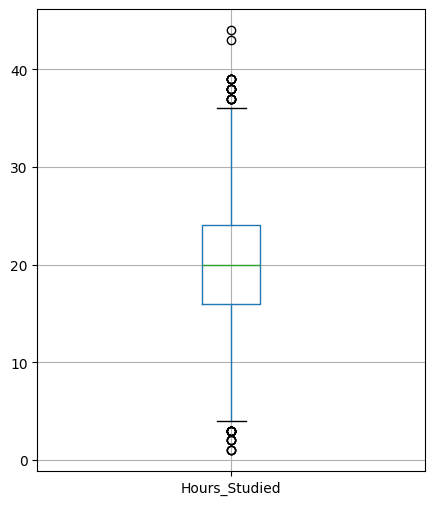

In [77]:
data.boxplot(column=['Hours_Studied'], figsize=(5,6))

<Axes: >

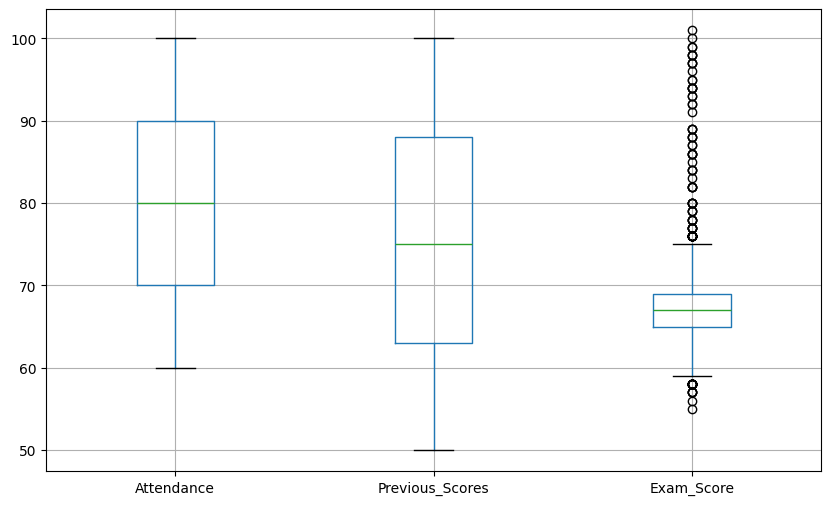

In [73]:
data.boxplot(column=['Attendance', 'Previous_Scores', 'Exam_Score'], figsize=(10,6))

<Axes: >

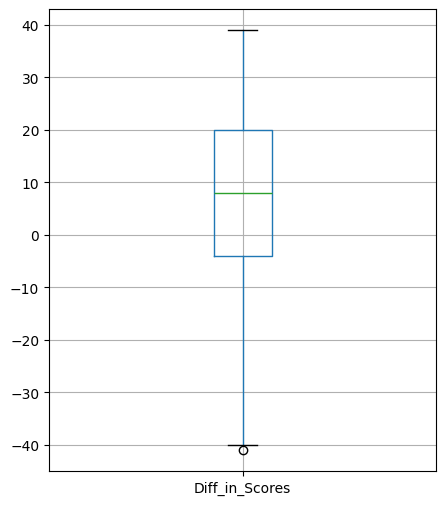

In [78]:
data.boxplot(column=['Diff_in_Scores'], figsize=(5,6))

<Axes: >

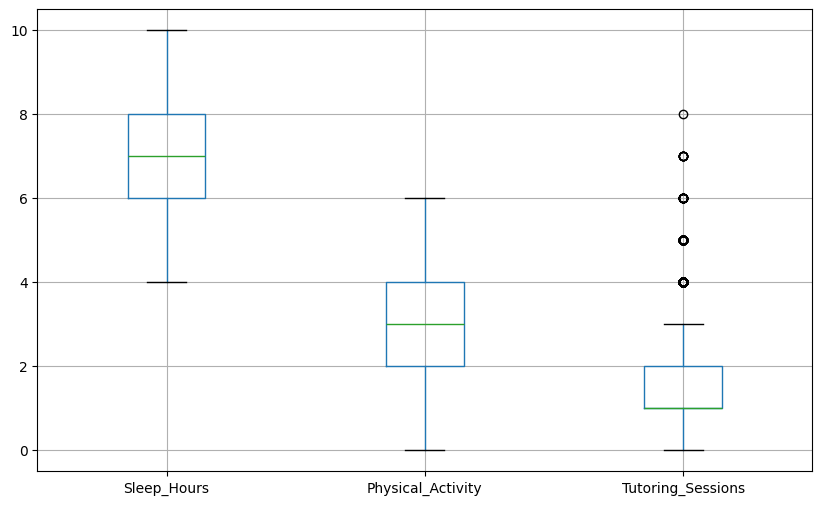

In [76]:
data.boxplot(column=['Sleep_Hours','Physical_Activity', 'Tutoring_Sessions'  ], figsize=(10, 6))

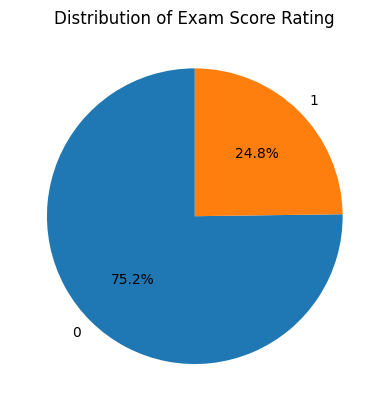

In [90]:
# Import matplotlib.pyplot for creating the pie chart
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Exam_Score_Rating' is the column you want to visualize
data['Exam_Score_Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Exam Score Rating')  # Add a title
plt.ylabel('')  # Remove the default ylabel
plt.show()

Scatter Plots

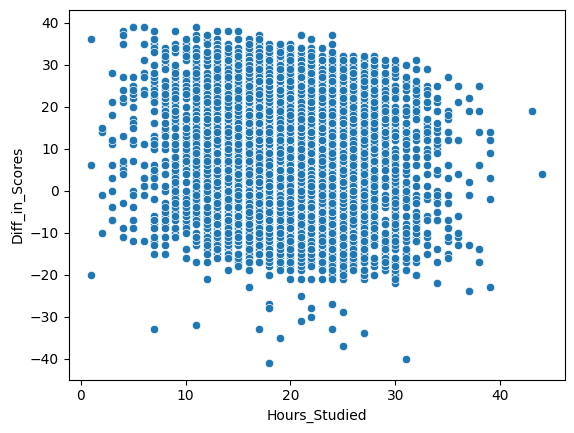

In [ ]:
scatterplot = sns.scatterplot(data=data, x='Hours_Studied', y='Diff_in_Scores')

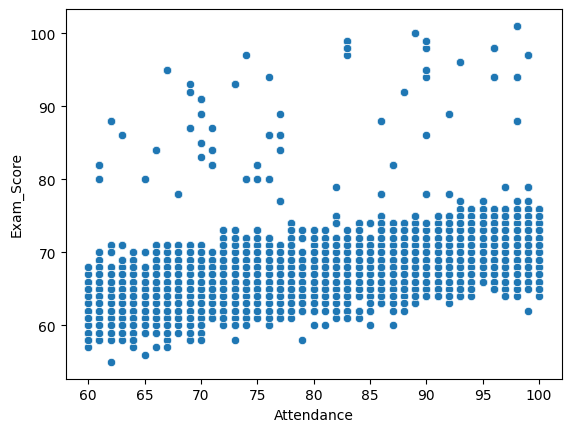

In [ ]:
scatterplot = sns.scatterplot(data=resampled_data, x='Attendance', y='Exam_Score')

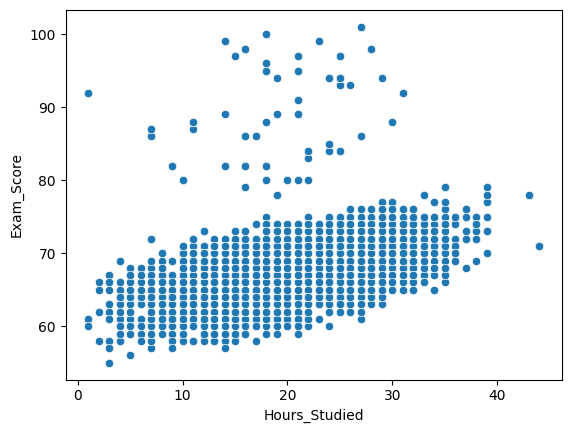

In [ ]:
scatterplot = sns.scatterplot(data=resampled_data, x='Hours_Studied', y='Exam_Score')

In [ ]:
scatterplot = sns.scatterplot(data=resampled_data, x='Previous_Scores', y='Exam_Score')

ValueError: Could not interpret value `Exam_Score` for `y`. An entry with this name does not appear in `data`.

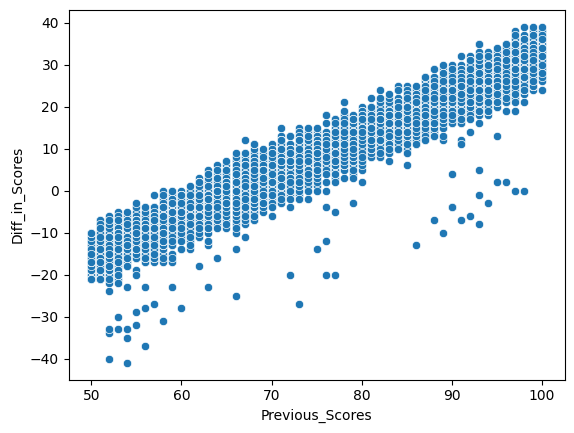

In [ ]:
scatterplot = sns.scatterplot(data=data, x='Previous_Scores', y='Diff_in_Scores')

Contingency Tables

In [20]:
# Contingency table for Exam_Score_Rating vs Gender

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Gender'])
print(contingency_table)

Gender                0     1
Exam_Score_Rating            
0                  2774  2023
1                   914   667


In [21]:
# Contingency table for Exam_Score_Rating vs Parental_Involvement

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Parental_Involvement'])
print(contingency_table)

Parental_Involvement     1     2     3
Exam_Score_Rating                     
0                     1068  2482  1247
1                      223   769   589


In [22]:
# Contingency table for Exam_Score_Rating vs Access_to_Resources

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Access_to_Resources'])
print(contingency_table)

Access_to_Resources     1     2     3
Exam_Score_Rating                    
0                    1076  2472  1249
1                     198   732   651


In [23]:
# Contingency table for Exam_Score_Rating vs Extracurricular_Activities

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Extracurricular_Activities'])
print(contingency_table)

Extracurricular_Activities     0     1
Exam_Score_Rating                     
0                           1986  2811
1                            585   996


In [24]:
# Contingency table for Exam_Score_Rating vs Motivation_Level

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Motivation_Level'])
print(contingency_table)

Motivation_Level      1     2    3
Exam_Score_Rating                 
0                  1472  2428  897
1                   392   809  380


In [25]:
# Contingency table for Exam_Score_Rating vs Internet_Access

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Internet_Access'])
print(contingency_table)

Internet_Access      0     1
Exam_Score_Rating           
0                  398  4399
1                   87  1494


In [26]:
# Contingency table for Exam_Score_Rating vs Family_Income

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Family_Income'])
print(contingency_table)

Family_Income         1     2    3
Exam_Score_Rating                 
0                  2032  1895  870
1                   550   671  360


In [27]:
# Contingency table for Exam_Score_Rating vs Teacher_Quality

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Teacher_Quality'])
print(contingency_table)

Teacher_Quality      1     2     3
Exam_Score_Rating                 
0                  521  2917  1359
1                  126   909   546


In [28]:
# Contingency table for Exam_Score_Rating vs School_Type

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['School_Type'])
print(contingency_table)

School_Type           0     1
Exam_Score_Rating            
0                  3347  1450
1                  1087   494


In [29]:
# Contingency table for Exam_Score_Rating vs Peer_Influence

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Peer_Influence'])
print(contingency_table)

Peer_Influence       -1     0     1
Exam_Score_Rating                  
0                  1081  1900  1816
1                   249   595   737


In [30]:
# Contingency table for Exam_Score_Rating vs Parental_Education_Level

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Parental_Education_Level'])
print(contingency_table)

Parental_Education_Level     1     2    3
Exam_Score_Rating                        
0                         2484  1431  882
1                          675   508  398


In [31]:
# Contingency table for Exam_Score_Rating vs Learning_Disabilities

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Learning_Disabilities'])
print(contingency_table)

Learning_Disabilities     0    1
Exam_Score_Rating               
0                      4246  551
1                      1464  117


In [32]:
# Contingency table for Exam_Score_Rating vs Distance_From_Home

contingency_table = pd.crosstab(data['Exam_Score_Rating'], data['Distance_from_Home'])
print(contingency_table)

Distance_from_Home     1     2    3
Exam_Score_Rating                  
0                   2756  1515  526
1                   1045   426  110


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

array([[<Axes: title={'center': 'Parental_Involvement'}>,
        <Axes: title={'center': 'Access_to_Resources'}>,
        <Axes: title={'center': 'Extracurricular_Activities'}>,
        <Axes: title={'center': 'Motivation_Level'}>],
       [<Axes: title={'center': 'Internet_Access'}>,
        <Axes: title={'center': 'Family_Income'}>,
        <Axes: title={'center': 'Teacher_Quality'}>,
        <Axes: title={'center': 'School_Type'}>],
       [<Axes: title={'center': 'Peer_Influence'}>,
        <Axes: title={'center': 'Learning_Disabilities'}>,
        <Axes: title={'center': 'Parental_Education_Level'}>,
        <Axes: title={'center': 'Distance_from_Home'}>],
       [<Axes: title={'center': 'Gender'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

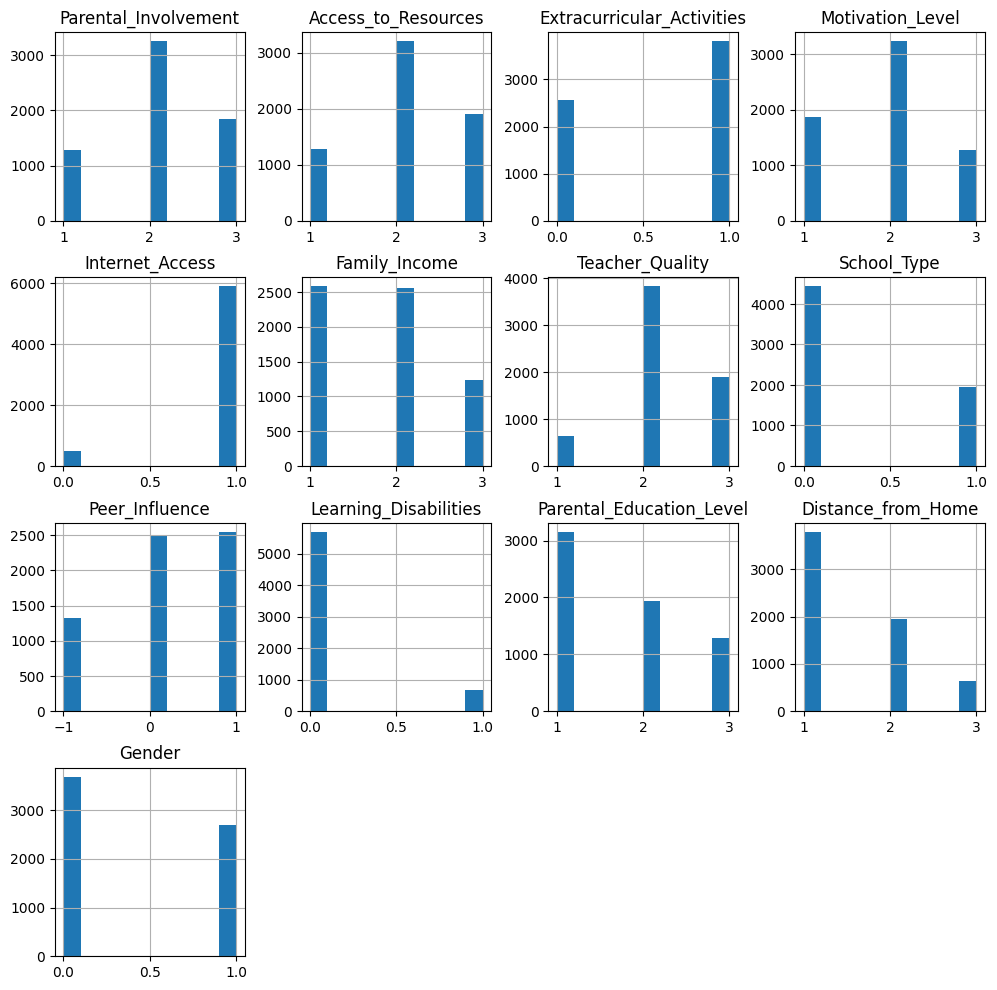

In [88]:
#view histograms
data.hist(column=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'], figsize=(12,12))

##SMOTE

In [91]:
count_0 = (data['Exam_Score_Rating'] == 0).sum()
count_1 = (data['Exam_Score_Rating'] == 1).sum()
print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")

Count of 0: 4797
Count of 1: 1581


In [93]:
#use SMOTE method to over sample data for a more uniform dataset
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate features and target
X = data[['Hours_Studied',	'Attendance',	'Parental_Involvement',	'Access_to_Resources',	'Extracurricular_Activities',	'Sleep_Hours',
          'Previous_Scores',	'Motivation_Level',	'Internet_Access',	'Tutoring_Sessions', 'Family_Income',	'Teacher_Quality',	'School_Type',
          'Peer_Influence',	'Physical_Activity',	'Learning_Disabilities',	'Parental_Education_Level',	'Distance_from_Home',
          'Gender']]
y = data['Exam_Score_Rating']

#RandomOverSampler
ros = RandomOverSampler(random_state=63)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine into a new DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exam_Score_Rating')], axis=1)

print("Original Dataset:")
print(data)
print("\nResampled Dataset:")
print(resampled_data)

Original Dataset:
      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    3   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     3                    2   
6603             23          76                     3                    2   
6604             20          90                     2                    1   
6605             10          86                     3                    3   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours

In [94]:
resampled_data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score_Rating
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000
mean,21.250782,83.374818,2.135710,2.165520,0.610381,7.024182,76.162289,1.939962,0.931207,1.580780,1.815718,2.224828,0.311966,0.242443,2.984261,0.093913,1.746091,1.470085,0.419012,0.500000
std,6.101342,11.508499,0.694673,0.696909,0.487689,1.471590,14.311884,0.696929,0.253115,1.281169,0.746666,0.602130,0.463320,0.744981,1.041344,0.291723,0.792798,0.652790,0.493423,0.500026
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,17.000000,74.000000,2.000000,2.000000,0.000000,6.000000,64.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,21.000000,85.000000,2.000000,2.000000,1.000000,7.000000,77.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.500000
75%,25.000000,93.000000,3.000000,3.000000,1.000000,8.000000,89.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,2.000000,1.000000,1.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.000000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,1.000000


In [37]:
count_0 = (resampled_data['Exam_Score_Rating'] == 0).sum()
count_1 = (resampled_data['Exam_Score_Rating'] == 1).sum()
print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")

Count of 0: 4797
Count of 1: 4797


In [38]:
resampled_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score_Rating
0,23,84,1,3,0,7,73,1,1,0,1,2,0,1,3,0,1,1,0,0
1,19,64,1,2,0,8,59,1,1,2,2,2,0,-1,4,0,2,2,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,0,0,4,0,3,1,0,1
3,29,89,1,2,1,8,98,2,1,1,2,2,0,-1,4,0,1,2,0,1
4,19,92,2,2,1,6,65,2,1,3,2,3,0,0,4,0,2,1,1,1


<Axes: >

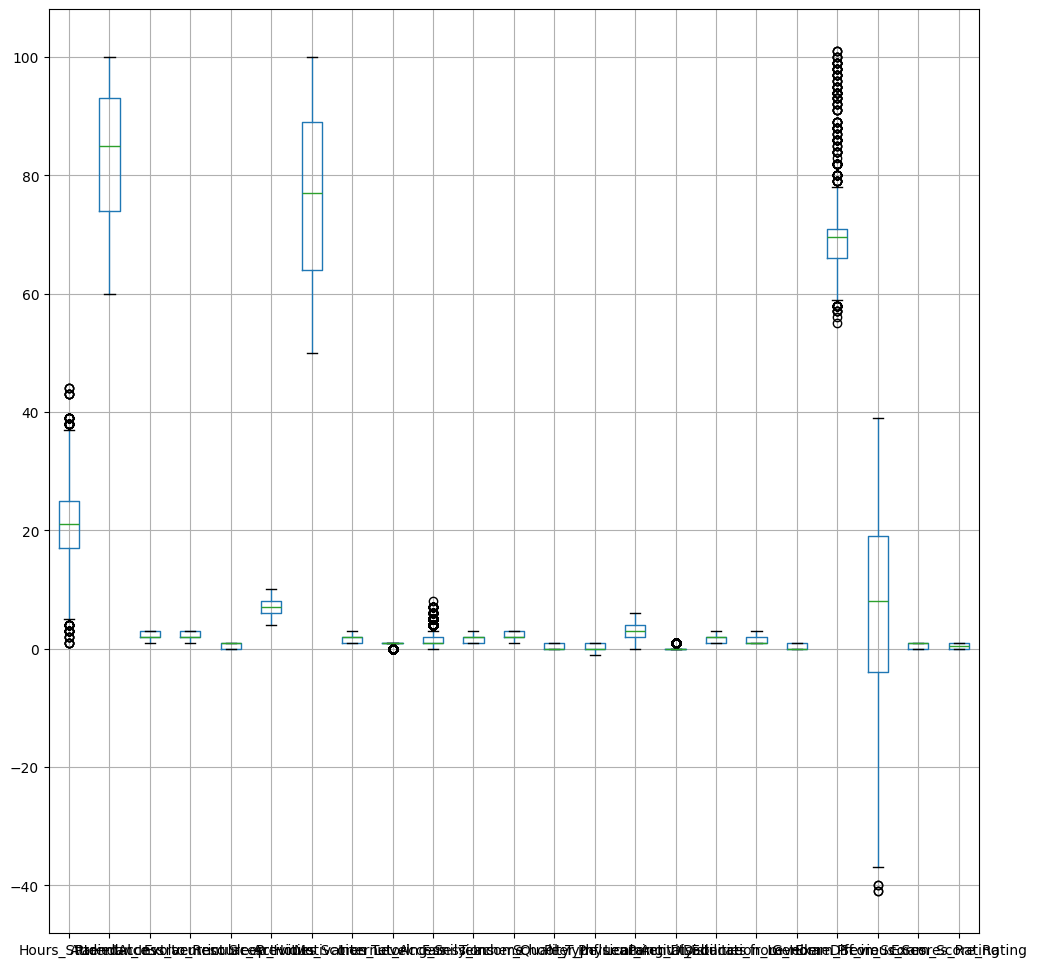

In [ ]:
resampled_data.boxplot(figsize=(12,12))

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Parental_Involvement'}>,
        <Axes: title={'center': 'Access_to_Resources'}>],
       [<Axes: title={'center': 'Extracurricular_Activities'}>,
        <Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Motivation_Level'}>],
       [<Axes: title={'center': 'Internet_Access'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Family_Income'}>,
        <Axes: title={'center': 'Teacher_Quality'}>],
       [<Axes: title={'center': 'School_Type'}>,
        <Axes: title={'center': 'Peer_Influence'}>,
        <Axes: title={'center': 'Physical_Activity'}>,
        <Axes: title={'center': 'Learning_Disabilities'}>],
       [<Axes: title={'center': 'Parental_Education_Level'}>,
        <Axes: title={'center': 'Distance_from_Home'}>,
        <Axes: ti

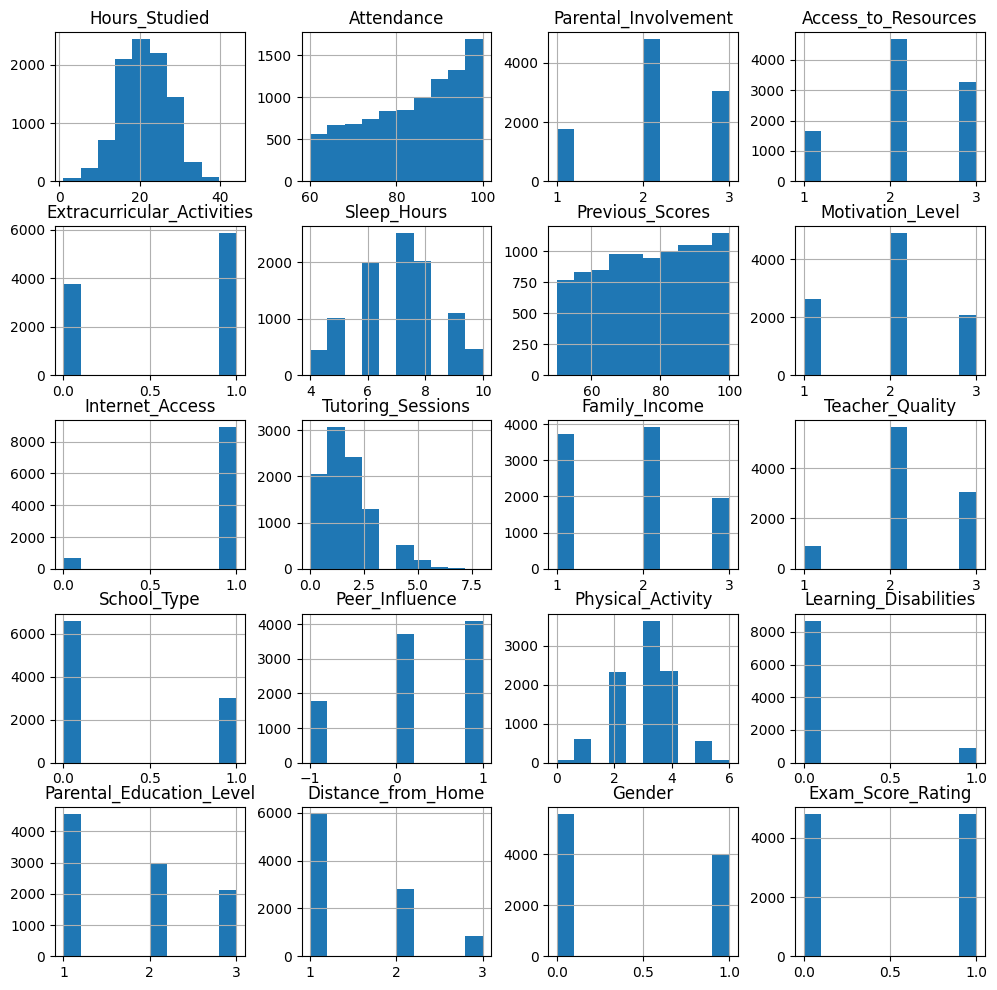

In [39]:
#view histograms of resampled data
resampled_data.hist(figsize=(12,12))

In [95]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9594 entries, 0 to 9593
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               9594 non-null   int64
 1   Attendance                  9594 non-null   int64
 2   Parental_Involvement        9594 non-null   int64
 3   Access_to_Resources         9594 non-null   int64
 4   Extracurricular_Activities  9594 non-null   int64
 5   Sleep_Hours                 9594 non-null   int64
 6   Previous_Scores             9594 non-null   int64
 7   Motivation_Level            9594 non-null   int64
 8   Internet_Access             9594 non-null   int64
 9   Tutoring_Sessions           9594 non-null   int64
 10  Family_Income               9594 non-null   int64
 11  Teacher_Quality             9594 non-null   int64
 12  School_Type                 9594 non-null   int64
 13  Peer_Influence              9594 non-null   int64
 14  Physical

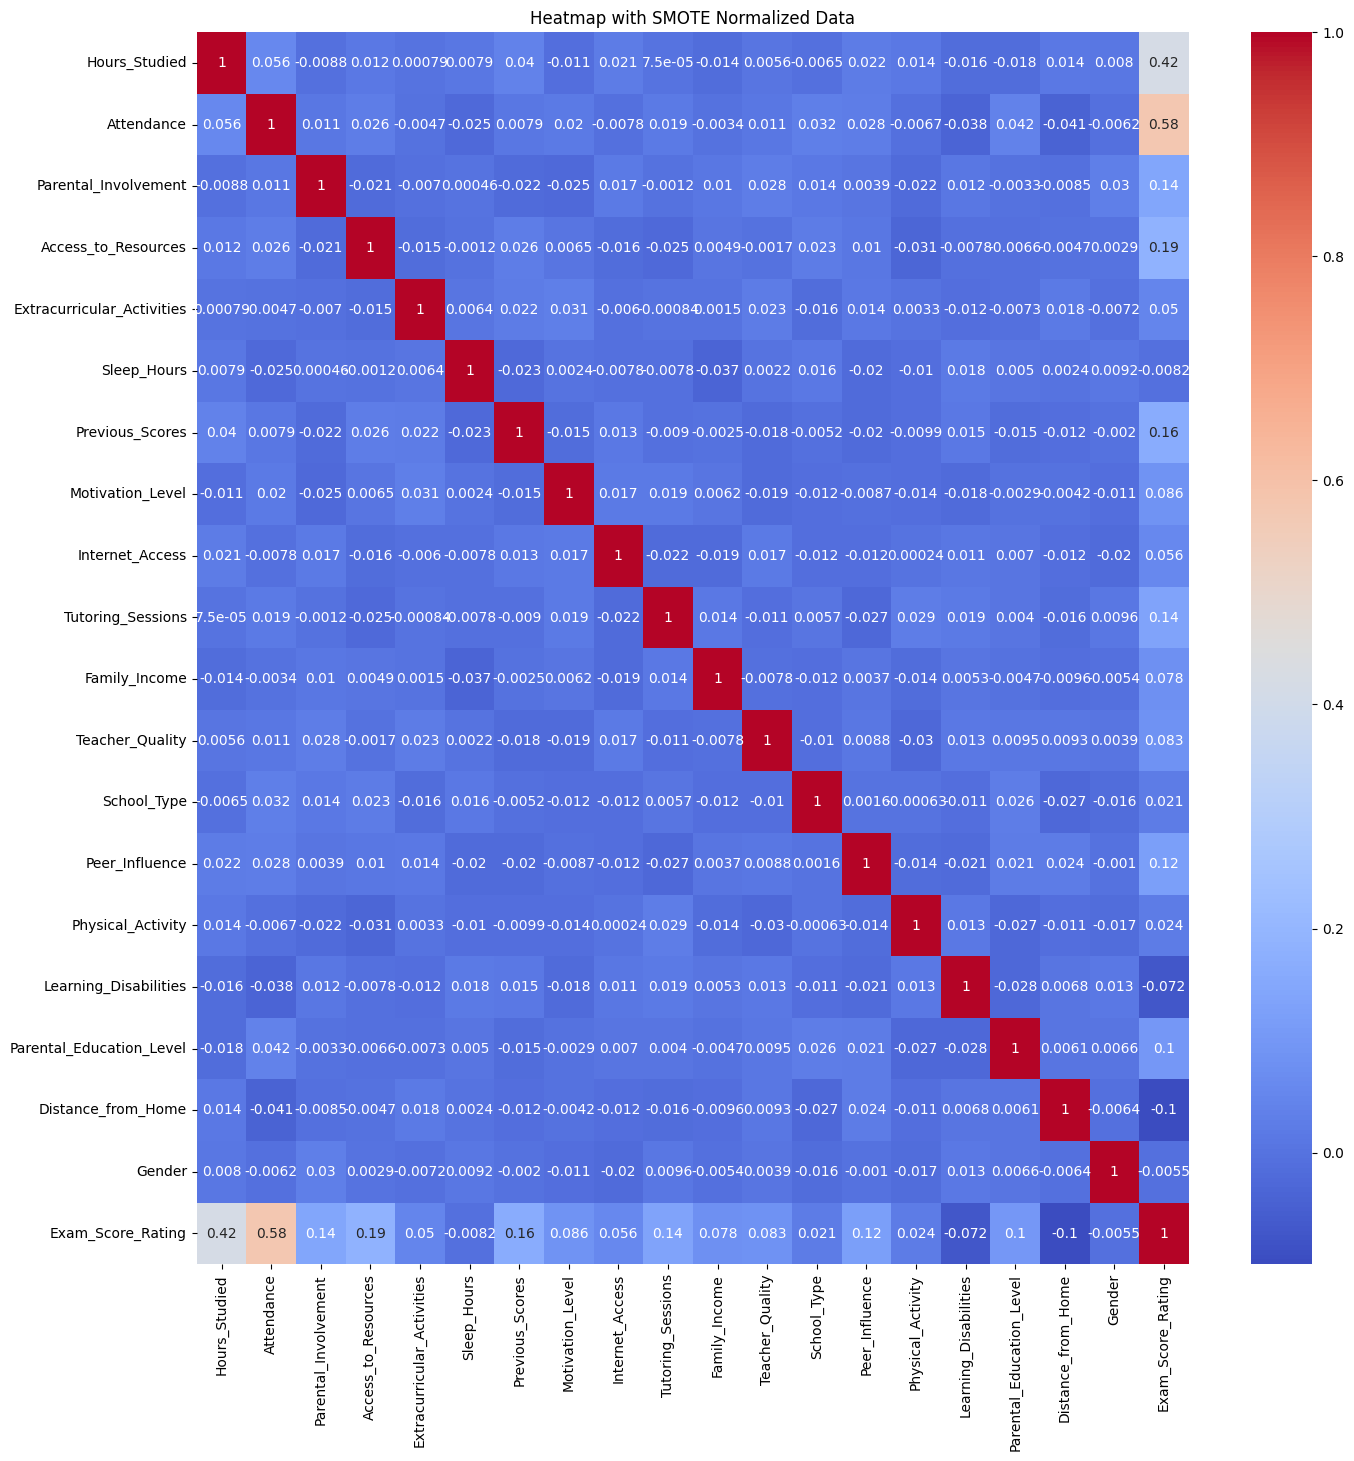

In [96]:
#Heatmap
#Using SMOTE tranformed data

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Select only numerical columns
resampled_numerical_columns = resampled_data.select_dtypes(include=['number'])

#Normalize the numerical columns
scaler = MinMaxScaler()
resampled_normalized_data = scaler.fit_transform(resampled_numerical_columns)

#Create a new DataFrame with normalized data
resampled_normalized_df = pd.DataFrame(resampled_normalized_data, columns=resampled_numerical_columns.columns)

#Recreate the heatmap with normalized data
plt.figure(figsize=(16, 16))
sns.heatmap(resampled_normalized_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap with SMOTE Normalized Data")
plt.show()





In [44]:
resampled_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score_Rating
0,23,84,1,3,0,7,73,1,1,0,1,2,0,1,3,0,1,1,0,0
1,19,64,1,2,0,8,59,1,1,2,2,2,0,-1,4,0,2,2,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,0,0,4,0,3,1,0,1
3,29,89,1,2,1,8,98,2,1,1,2,2,0,-1,4,0,1,2,0,1
4,19,92,2,2,1,6,65,2,1,3,2,3,0,0,4,0,2,1,1,1


In [45]:
resampled_data['Exam_Score_Rating'].value_counts()

,count
Exam_Score_Rating,
0,4797
1,4797


Model


[[769 201]
 [ 82 867]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       970
           1       0.81      0.91      0.86       949

    accuracy                           0.85      1919
   macro avg       0.86      0.85      0.85      1919
weighted avg       0.86      0.85      0.85      1919

AUC: 0.9271718466535583


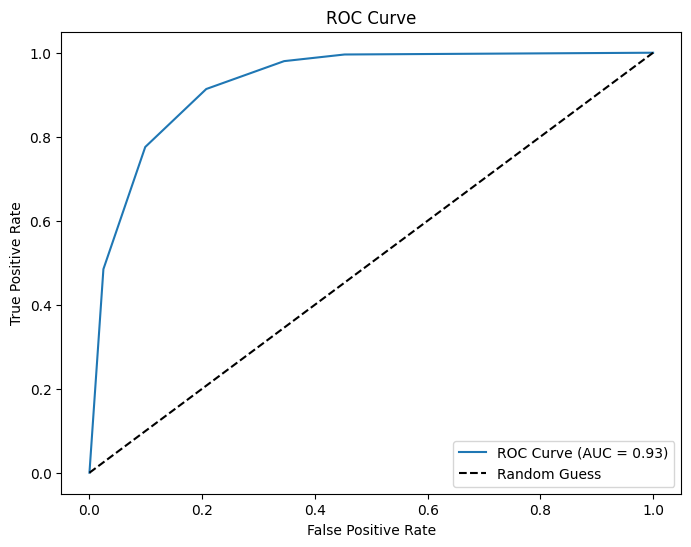

In [97]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

target = 'Exam_Score_Rating'
X = resampled_data.drop(columns=[target])
y = resampled_data[target]
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=195)
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# Predict y data with classifier:
y_predict = classifier.predict(X_test)
# Print results:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


# Calculate accuracy, precision, recall, and F1 score
#accuracy = accuracy_score(y_test, y_predict)
#precision = precision_score(y_test, y_predict, average='weighted')
#recall = recall_score(y_test, y_predict, average='weighted')
#f1 = f1_score(y_test, y_predict, average='weighted')

#AUC
y_prob = classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Evaluate classification metrics

print("Training Accuracy:", classifier.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_predict))

Training Accuracy: 0.9018892508143322
Test Accuracy: 0.8525273579989577


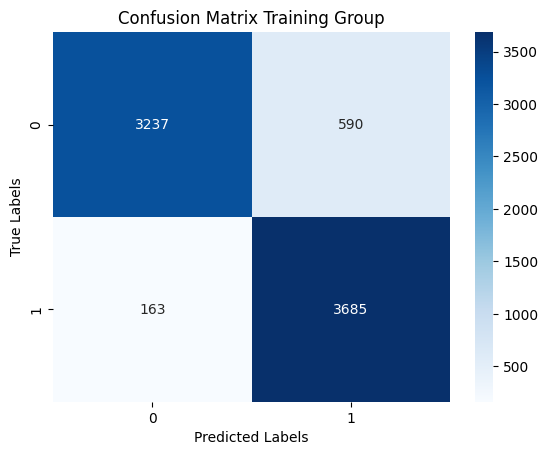

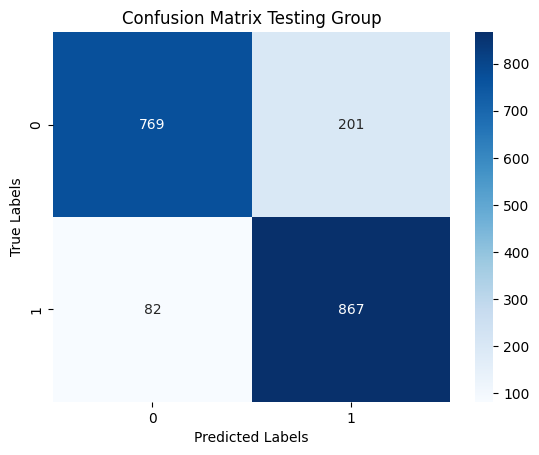

In [98]:
# Confusion Matrix for Training Data
sns.heatmap(confusion_matrix(y_train, classifier.predict(X_train)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Training Group')
plt.show()

# Confusion Matrix for Testing Data
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Testing Group')
plt.show()